In [3]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
from scipy import signal

## Tuesday Week 2 (16/07/2024): Have to create a class for an stellar mass profile
 - Look at https://github.com/LSSTDESC/CCL/blob/master/pyccl/halos/profiles/nfw.py as an example of the creation of a halo mass profile.
 - Python docs on classes: https://docs.python.org/3/tutorial/classes.html
 - Selected bits: 
   - the class inheritance mechanism allows multiple base classes
   - a derived class can override any methods of its base class or classes
   - a method can call the method of a base class with the same name

$\rho_X(r)\ = Ma ^{-3} f_X g_X(r)\$. 

- M = total halo mass
- $f_X$ = the fraction of that mass in gas species X
- $g(x)$ = the profile, which satisfies the normalisation $4 \pi \int ^{\infty}_0 dr\ r^2\ g_X(r)\ = 1$
- a = the scale factor

$f_c + f_b + f_e + f_* = 1$ AND (assuming adiabaticity) $f_b + f_e + f_* = \bar{f}_b \equiv \frac{\Omega_b}{\Omega_M}$      

$\rho_{bcm}(r)\ =  \rho_{cdm}(r)\ + \rho_{*}(r)\ + \rho_{ej}(r)\ + \rho_{bd}(r)\ $      
$; a(t) = \frac{1}{1+z}$

(see: [pdf](../Background-reading/XrayCrossCorrelations-1.pdf)).  
$g_*(r)\ \equiv \delta^D$(**x**) , centred at $r=0$. (a Delta function; Dirac delta function = also called the "unit impulse")   
& the Fourier profile is then:   
$\tilde{g}_*(k)\ = 1$

In [ ]:
signal.unit_impulse(len(trial_r), None)
# np.where(trial_r2==0)[0]#[0]

In [78]:
class stellar_profile(ccl.halos.profiles.profile_base.HaloProfile): #(ccl.halos.Haloprofile):
    """Creating a class for the stellar density profile
    where: """  # could put in the equations used

    def __init__(self, mass_def):
        super(stellar_profile, self).__init__(mass_def=mass_def)

    def _real(self, r, M, centre_pt=None, # want delta centred at r=0 (& since log scale, can't do negative or zero values in array)
              a=1): # set the default pars for scale factor a 
        r_use = np.atleast_1d(r) # need them to be functional arrays
        M_use = np.atleast_1d(M)
        len_r = len(r_use) # np.shape(r_use)[0] # equivalent to len(r), but allows for multi-dim arrays
# Returns: float or array_like: halo profile. Shape of output = `(N_M, N_r)` where `N_r` & `N_m` = the sizes of `r` & `M` respectively.

        prefix = M_use / a**3
    # unit_impulse(shape, idx=None, dtype=<class 'float'>) ; idx = Index at which the value is 1. If None, defaults to the 0th element.
    # If idx='mid', the impulse will be centered at shape // 2 in all dimensions. If an int, the impulse will be at idx in all dimensions.
      #  prof = prefix[:, None] * signal.unit_impulse(len_r)[None,:]
        prof = prefix[:, None] * signal.unit_impulse(len_r, centre_pt)[None,:]

        # want dirac delta(x=0)
       # r_array = r_use
       # for r in r_use:
       #     if r==0:
                
        
        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof

    def _fourier(self, k, M, a=1):
        k_use = np.atleast_1d(k)
        M_use = np.atleast_1d(M)

        prefix = M_use / a**3
        prof = np.ones_like(k_use)[None,:] * prefix[:, None] # k_use[None,:] + prefix[:, None] * 1 # as g(k) = 1

        if np.ndim(k) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)

        return prof
    

In [80]:
# working with z = 0 (today) ; therefore a = 1
# use a mass definition with Delta = 200
hmd_200c = ccl.halos.MassDef200c
trial_Prof = stellar_profile(hmd_200c)

In [82]:
trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_M = np.array([5E12,2E13, 1E14])
profTrial_real = trial_Prof._real(trial_r, trial_M)
profTrial_real  # _real(self, r, M, centre_pt='mid', a=1)

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

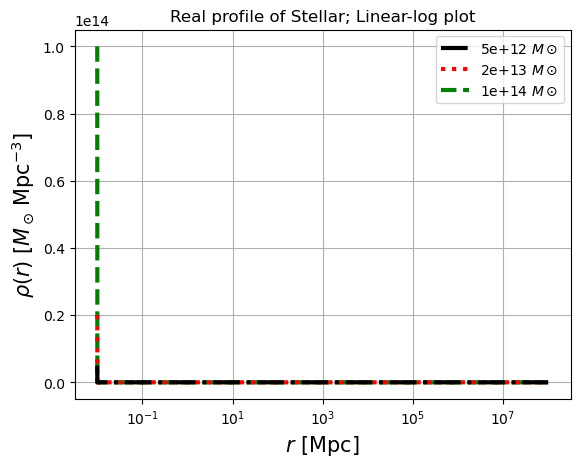

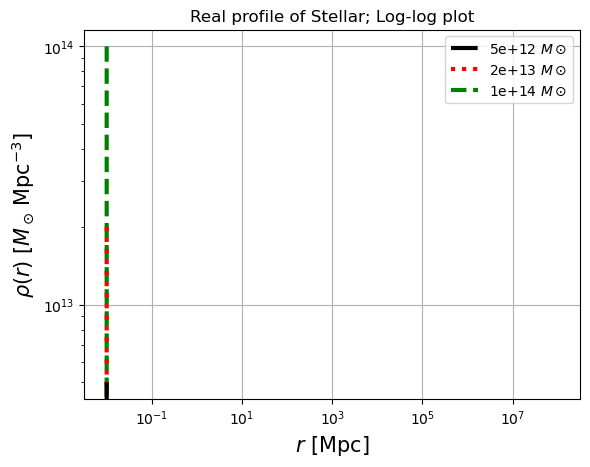

In [84]:
colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Linear-log plot')
plt.grid(True)
plt.xscale('log');
plt.legend(loc='best')
#plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

In [86]:
trial_k = np.geomspace(5E-3,1E2,100_000) # np.geomspace(1E-20,1E2,100000)
trial_M = np.array([5E12,2E13, 1E14])
profTrial_fourier = trial_Prof._fourier(trial_k, trial_M)
profTrial_fourier

array([[5.e+12, 5.e+12, 5.e+12, ..., 5.e+12, 5.e+12, 5.e+12],
       [2.e+13, 2.e+13, 2.e+13, ..., 2.e+13, 2.e+13, 2.e+13],
       [1.e+14, 1.e+14, 1.e+14, ..., 1.e+14, 1.e+14, 1.e+14]])

#### Normalisation of profiles means that:   
$\rho(k \to 0)\ _x = \frac{M_x}{a^3} [f_x]$   
#### So plotting $y = x + \frac{M_x}{a^3} [f_x]$ should give an overlap with the [normalised] Fourier density profile's plateau

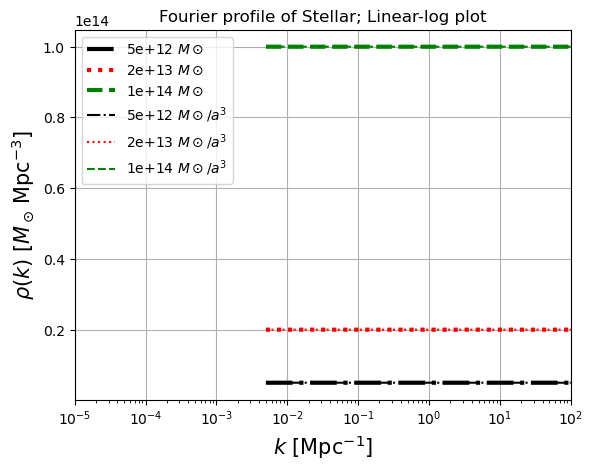

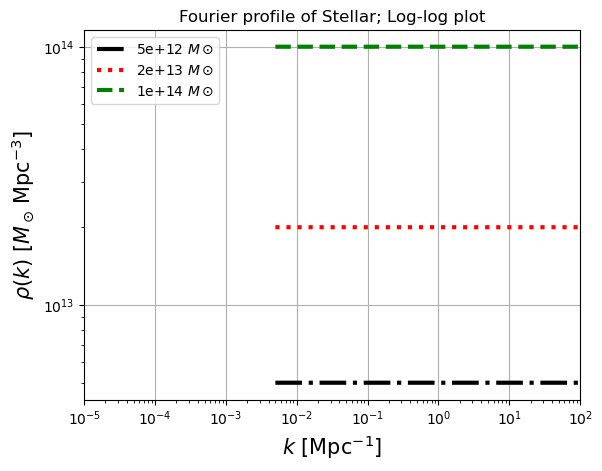

In [89]:
#### colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
for mass, col in zip(trial_M, colours):
    plt.plot(trial_k, 1*trial_k + mass, col, zorder=(10-i), label=f'{mass:.1g} $M \\odot /a^3$')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

# Check my Fourier against the inbuilt Fourier method

In [92]:
class stelProf(ccl.halos.profiles.profile_base.HaloProfile): #(ccl.halos.Haloprofile):
    """Creating a class for the stellar density profile
    where: """  # could put in the equations used

    def __init__(self, mass_def):
        super(stelProf, self).__init__(mass_def=mass_def)

    def _real(self, cosmo, r, M, centre_pt=None, # want delta centred at r=0 (& since log scale, can't do negative or zero values in array)
              a=1): # set the default pars for scale factor a 
        r_use = np.atleast_1d(r) # need them to be functional arrays
        M_use = np.atleast_1d(M)
        len_r = len(r_use) # np.shape(r_use)[0] # equivalent to len(r), but allows for multi-dim arrays
# Returns: float or array_like: halo profile. Shape of output = `(N_M, N_r)` where `N_r` & `N_m` = the sizes of `r` & `M` respectively.

        prefix = M_use / a**3
    # unit_impulse(shape, idx=None, dtype=<class 'float'>) ; idx = Index at which the value is 1. If None, defaults to the 0th element.
    # If idx='mid', the impulse will be centered at shape // 2 in all dimensions. If an int, the impulse will be at idx in all dimensions.
        prof = prefix[:, None] * signal.unit_impulse(len_r, centre_pt)[None,:]
        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof
    

In [93]:
# working with z = 0 (today) ; therefore a = 1 # use a mass definition with Delta = 200
hmd_200c = ccl.halos.MassDef200c
builtIn_trial = stelProf(hmd_200c)

In [94]:
#trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
#trial_M = np.array([5E12,2E13, 1E14])
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
# change h=0.07 to h=0.7
builtIn_real = builtIn_trial._real(cosmo, trial_r, trial_M)
builtIn_real  # _real(self, r, M, centre_pt='mid', a=1)

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

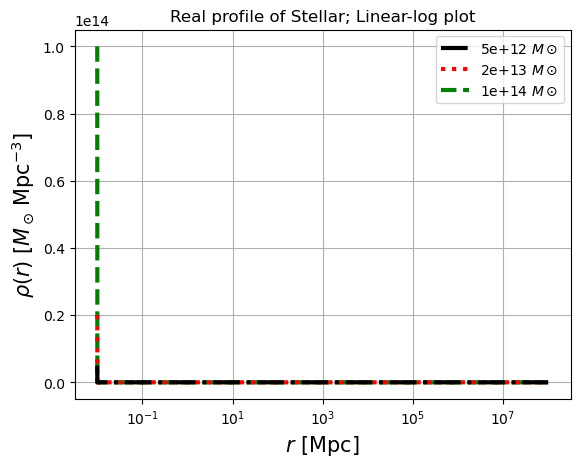

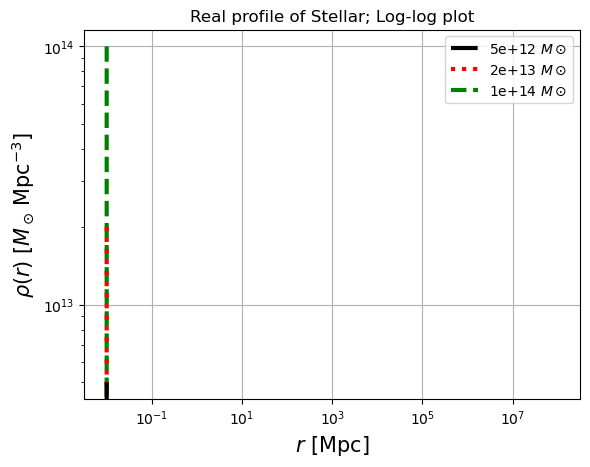

In [99]:
colours = ['k-.', 'r:', 'g--']
i = 0
for mass, prof, col in zip(trial_M, builtIn_real, colours):
    plt.plot(trial_r, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Linear-log plot')
plt.grid(True)
plt.xscale('log');
plt.legend(loc='best')
#plt.xlim(1e-2,1e5); #plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for mass, prof, col in zip(trial_M, builtIn_real, colours):
    plt.plot(trial_r, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-2,1e5); #plt.ylim(1e-2,1e5);

In [100]:
ccl.halos.profiles.profile_base.HaloProfile.fourier

<function pyccl.halos.profiles.profile_base.HaloProfile.fourier(self, cosmo, k, M, a)>

In [103]:
# print('cosmo: ', type(cosmo), cosmo) 
trial_k2 = np.geomspace(1E-20,1E-1,100000)
builtIn_fourier = builtIn_trial.fourier(cosmo=cosmo, k=trial_k2, M=trial_M, a=1)
builtIn_fourier

array([[8.52907319e-19, 8.52899625e-19, 8.52891932e-19, ...,
        8.35680684e-20, 8.35603748e-20, 8.35526811e-20],
       [3.41162928e-18, 3.41159850e-18, 3.41156773e-18, ...,
        3.34272274e-19, 3.34241499e-19, 3.34210725e-19],
       [1.70581464e-17, 1.70579925e-17, 1.70578386e-17, ...,
        1.67136137e-18, 1.67120750e-18, 1.67105362e-18]])

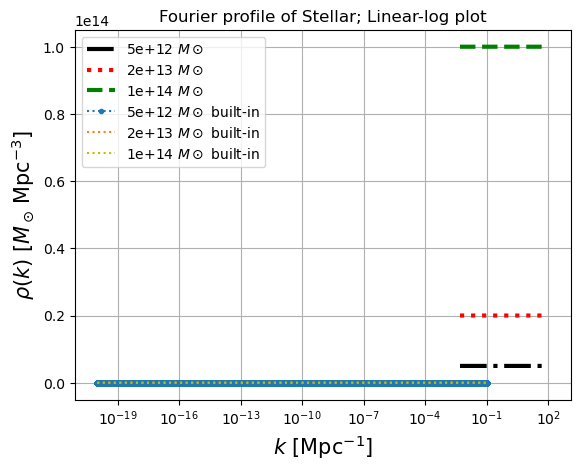

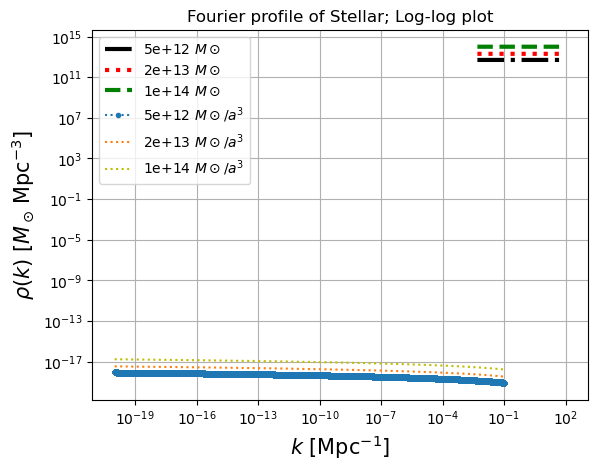

In [105]:
colours2 = [':.', ':', 'y:']
i = 0
for mass, prof, col in zip(trial_M, profTrial_fourier, colours):
    plt.plot(trial_k, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
for mass, col, prof in zip(trial_M, colours2, builtIn_fourier):
    plt.plot(trial_k2, prof, col, zorder=(5-i), label=f'{mass:.1g} $M \\odot $ built-in')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
#plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
for mass, col, prof in zip(trial_M, colours2, builtIn_fourier):
    plt.plot(trial_k2, prof, col, zorder=(5-i), label=f'{mass:.1g} $M \\odot /a^3$')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

# Testing the importation of the StellarProfile class from its .py file

In [108]:
import BCMprofiles_Copy2 as bcm_tester

In [109]:
help(stel_tester)

NameError: name 'stel_tester' is not defined

In [111]:
bcm_tester.CombinedStellarGasProfile
help(bcm_tester.StellarProfile)

Help on class StellarProfile in module BCMprofiles_Copy2:

class StellarProfile(pyccl.halos.profiles.profile_base.HaloProfile)
 |  StellarProfile(self, cosmo, mass_def, fourier_analytic=True)
 |
 |  Creating a class for the stellar density profile
 |  where: $\rho_*(r)\ = Ma ^{-3} g_*(r)\ $ & $g_*(r)\ \equiv \delta^D$(**x**) (a Dirac delta funciton centred at $r=0$).
 |  The normalised Fourier profile is then given by: $\tilde{g}_*(k)\ = 1$.
 |
 |  Method resolution order:
 |      StellarProfile
 |      pyccl.halos.profiles.profile_base.HaloProfile
 |      pyccl._core.schema.CCLAutoRepr
 |      pyccl._core.schema.CCLObject
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, cosmo, mass_def, fourier_analytic=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  __abstractmethods__ = frozenset()
 |
 

In [113]:
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200c)
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.07, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
trial_gamma = 1.2 

tester = bcm_tester.StellarProfile(cosmo, hmd_200c, fourier_analytic=True)
# bcm_tester.CombinedStellarGasProfile(cosmo, hmd_200c, cM, trial_gamma, fourier_analytic=False)
tester_real = tester._real(cosmo, trial_r, trial_M)
tester_real

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

In [115]:
np.shape(tester_real)#[0])
#tester_real[0]
tester_real[0].shape

(100000,)

In [117]:
help(tester._fourier)

Help on method _fourier_analytic in module BCMprofiles_Copy2:

_fourier_analytic(k, M, scale_a=1) method of BCMprofiles_Copy2.StellarProfile instance



In [119]:
tester._fourier(k=trial_k2, M=trial_M[0], scale_a=1)

array([5.e+12, 5.e+12, 5.e+12, ..., 5.e+12, 5.e+12, 5.e+12])

### Testing ability to use fourier_analytic=False

In [122]:
class StellarProfile(ccl.halos.profiles.profile_base.HaloProfile): 
    """Creating a class for the stellar density profile
    where: $\\rho_*(r)\ = Ma ^{-3} g_*(r)\ $ & $g_*(r)\ \\equiv \\delta^D$(**x**) (a Dirac delta funciton centred at $r=0$). 
    The normalised Fourier profile is then given by: $\\tilde{g}_*(k)\ = 1$.
    
    """  

    def __init__(self, mass_def, fourier_analytic=True):
        super(StellarProfile, self).__init__(mass_def=mass_def)
        self.fourier_analytic = fourier_analytic
        if fourier_analytic == True:
            self._fourier = self._fourier_analytic

    def _real(self, cosmo, r, M, scale_a=1, centre_pt=None): 
        # want delta centred at r=0 (& since log scale, can't do negative or zero values in array)
        print(centre_pt)
        print(M)
        r_use = np.atleast_1d(r) 
        M_use = np.atleast_1d(M)
        len_r = len(r_use) 

        prefix = M_use / scale_a**3
        print(len_r, centre_pt)
        pulse = signal.unit_impulse(len_r, centre_pt)
     #   prof = prefix[:, None] * signal.unit_impulse(len_r, centre_pt)[None,:] # If centre_pt=None, defaults to index at the 0th element.
        prof = prefix[:, None] * pulse[None, :]

        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof

    def _fourier_analytic(self, k, M, scale_a=1):
        k_use = np.atleast_1d(k)
        M_use = np.atleast_1d(M)

        prefix = M_use / scale_a**3
        prof = np.ones_like(k_use)[None,:] * prefix[:, None] # k_use[None,:] + prefix[:, None] * 1 # as g(k) = 1

        if np.ndim(k) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)

        return prof

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
/var/folders/fj/p1qj16jj5pl9df1rgw6p12tc000vry/T/ipykernel_20323/4077240354.py:2: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the stellar density profile


In [124]:
tester = StellarProfile(hmd_200c, fourier_analytic=False)
tester._real(cosmo, trial_r, trial_M)

None
[5.e+12 2.e+13 1.e+14]
100000 None


array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

In [126]:
tester.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

None
[5.e+12 2.e+13 1.e+14]
600 None


array([[-9.48028809e+10, -9.47642336e+10, -9.47255638e+10, ...,
         1.97182422e+02,  1.97183220e+02,  1.97184019e+02],
       [-3.79211524e+11, -3.79056934e+11, -3.78902255e+11, ...,
         7.88729688e+02,  7.88732881e+02,  7.88736074e+02],
       [-1.89605762e+12, -1.89528467e+12, -1.89451128e+12, ...,
         3.94364844e+03,  3.94366440e+03,  3.94368037e+03]])